In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [69]:
df_wines = pd.read_csv('winequalityN.csv')
df_wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [70]:
df_white = df_wines[df_wines['type'] == 'white']
white = df_white.drop('type', axis=1)
df_white = df_white.drop('type', axis=1)
df_white = df_white.drop('quality', axis=1)


X = df_white
X.isna().sum()

fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
dtype: int64

In [71]:
nulos = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for columna in nulos:
    ##X[X[columna].isna()] = X[columna].mean()
    X[columna].fillna(X[columna].mean(), inplace=True)

X.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [73]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


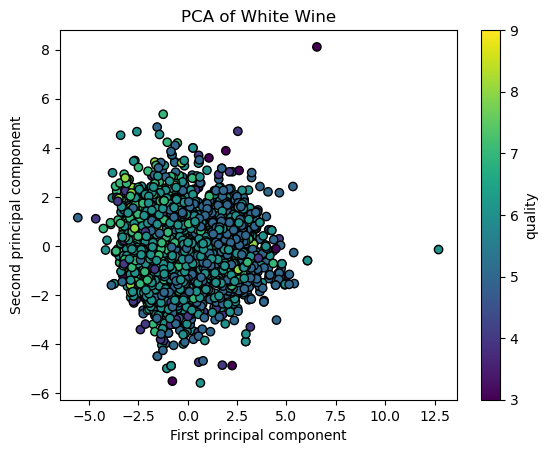

In [74]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=white['quality'], cmap='viridis', edgecolors='k')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of White Wine')
plt.colorbar(label='quality')
plt.show()
